In [ ]:
!conda install pyarrow
!pip install pydicom kornia opencv-python scikit-image nbdev

/bin/bash: line 1: conda: command not found


In [ ]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom

import pandas as pd

In [ ]:
pneumothorax_source = untar_data(URLs.SIIM_SMALL)

In [ ]:
items = get_dicom_files(pneumothorax_source/f"train/")

In [ ]:
trn,val = RandomSplitter()(items)

In [ ]:
patient = 7
xray_sample = items[patient].dcmread()

In [ ]:
xray_sample

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.4669.1517875184.50463
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.4669.1517875184.50463
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time          

In [ ]:
xray_sample.PixelData[:200]

b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00\xe0\xca\xb2\x01\x00\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xc0\x00\x0b\x08\x04\x00\x04\x00\x01\x01\x11\x00\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x01\x02\x05\x06\x00\x07\x08\t\xff\xc4\x00c\x10\x00\x01\x03\x03\x03\x02\x04\x03\x03\x06\x06\x08\x11\t\x07\x05\x01\x00\x02\x11\x03\x04!\x121A\x05Q\x06\x13"a2q\x81\x07\x91\xa1\x14\x15#B\xb1\xd2\x08\x16R\xb3\xc1\xd1$3\x94\x95\xb2\xd3\xe1\xf1\t\x17\x19%&6'

In [ ]:
xray_sample.pixel_array, xray_sample.pixel_array.shape

(array([[ 2,  0,  1, ...,  0,  0,  1],
        [ 2,  1,  3, ...,  1,  1,  1],
        [ 1,  2,  1, ...,  1,  1,  1],
        ...,
        [ 7, 11, 11, ..., 35, 43, 25],
        [ 6, 10, 10, ..., 30, 39, 24],
        [ 1,  5,  5, ..., 12, 23, 10]], dtype=uint8),
 (1024, 1024))

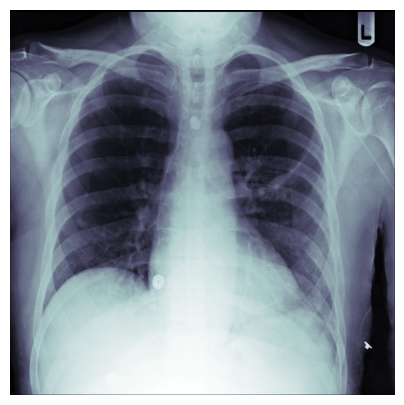

In [ ]:
xray_sample.show()

In [ ]:
dicom_dataframe = pd.DataFrame.from_dicoms(items)
dicom_dataframe[:5]

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysicianName,SeriesDescription,...,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod,fname,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.31988.1517875157.881392,19010101,000000.00,,CR,WSD,(),view: PA,...,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000037.dcm,0,255,176.959857,51.083963,0.036505
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.32219.1517875159.70802,19010101,000000.00,,CR,WSD,(),view: PA,...,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000006.dcm,0,255,153.405355,59.543063,0.144505
2,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.4000.1517875180.584919,19010101,000000.00,,CR,WSD,(),view: PA,...,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000078.dcm,0,255,122.324100,65.610590,0.296873
3,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.12979.1517875242.846655,19010101,000000.00,,CR,WSD,(),view: AP,...,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000090.dcm,0,240,93.372993,40.296406,0.355046
4,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.421.1517875162.854869,19010101,000000.00,,CR,WSD,(),view: PA,...,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000169.dcm,0,255,101.781173,40.751440,0.136377


In [ ]:
df = pd.read_csv(pneumothorax_source/f"labels.csv")
df.head()

,file,label
0,train/No Pneumothorax/000000.dcm,No Pneumothorax
1,train/Pneumothorax/000001.dcm,Pneumothorax
2,train/No Pneumothorax/000002.dcm,No Pneumothorax
3,train/Pneumothorax/000003.dcm,Pneumothorax
4,train/Pneumothorax/000004.dcm,Pneumothorax


In [ ]:
pneumothorax = DataBlock(blocks=(ImageBlock(cls=PILDicom), CategoryBlock),
                   get_x=lambda x:pneumothorax_source/f"{x[0]}",
                   get_y=lambda x:x[1],
                   batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])

dls = pneumothorax.dataloaders(df.values, num_workers=0)

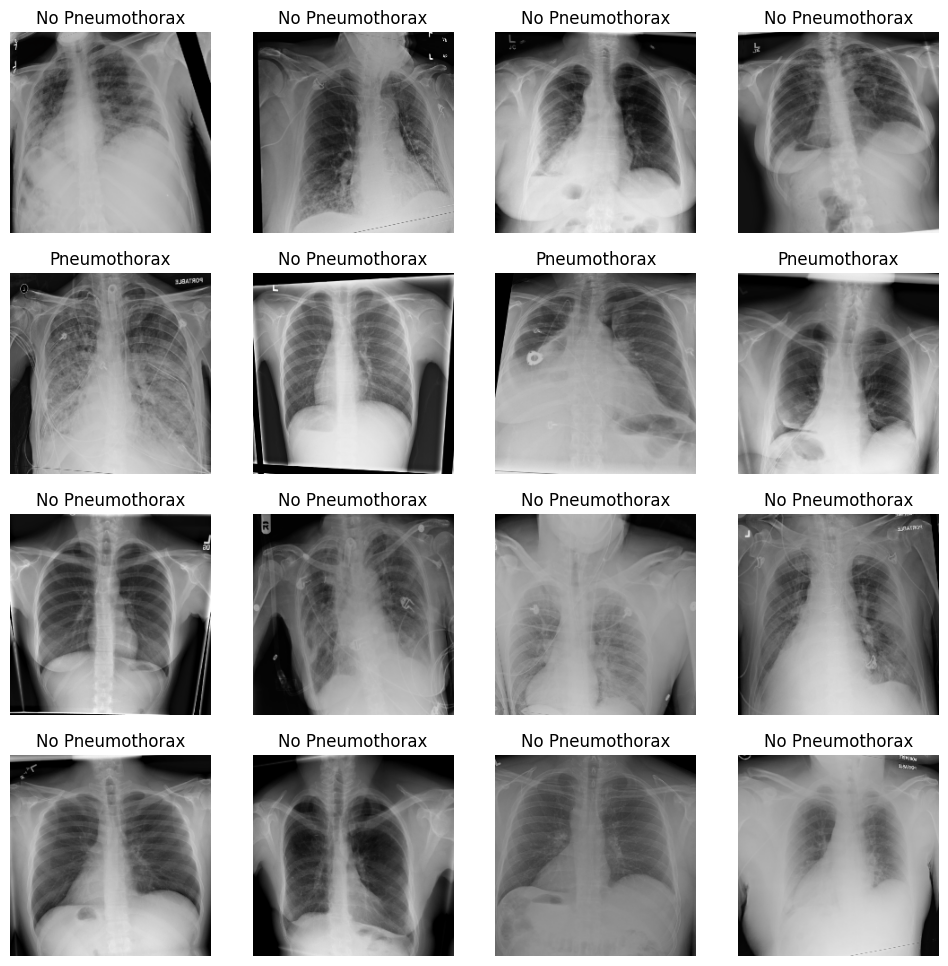

In [ ]:
dls = pneumothorax.dataloaders(df.values)
dls.show_batch(max_n=16)

In [ ]:
dls.size()

In [ ]:
learn = vision_learner(dls, resnet152, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to /root/.cache/torch/hub/checkpoints/resnet152-f82ba261.pth
100%|██████████| 230M/230M [00:13<00:00, 17.6MB/s]


In [ ]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [ ]:
learn.opt_func

<function fastai.optimizer.Adam(params: 'Tensor | Iterable', lr: 'float | slice', mom: 'float' = 0.9, sqr_mom: 'float' = 0.99, eps: 'float' = 1e-05, wd: 'Real' = 0.01, decouple_wd: 'bool' = True) -> 'Optimizer'>

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,None,time


TypeError: Exception occured in `Recorder` when calling event `after_batch`:
	'numpy.float64' object is not callable

In [ ]:
"""k = learn.predict(pneumothorax_source/f"train/Pneumothorax/000004.dcm")
print(k)
print(type(k))
print(k[2][1])
if k[2][1] > 0.5:
  print("Pneumothorax Detected!")

another = learn.predict("x.dicom")
if another[2][1] > 0.5:
  print("Pneumothorax khaise!")
if another[2][0] > 0.5:
  print("Pneumothorax hoynai!")"""

In [ ]:
tta = learn.tta(use_max=True)

In [ ]:
learn.show_results(max_n=16)

In [ ]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

In [ ]:
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]
print(tn, fp, fn, tp)

In [ ]:
sensitivity = tp/(tp + fn)
sensitivity

In [ ]:
specificity = tn/(fp + tn)
specificity

In [ ]:
ppv = tp/(tp+fp)
ppv

In [ ]:
npv = tn/(tn+fn)
npv

In [ ]:
val = dls.valid_ds.cat
val

NameError: name 'dls' is not defined

In [ ]:
prevalence = 19/50
prevalence

In [ ]:
accuracy = (sensitivity * prevalence) + (specificity * (1 - prevalence))
accuracy

In [ ]:
print(URLs.SIIM_SMALL)

In [ ]:
acc = (tn+tp)/(tn+tp+fn+fp)
acc

In [ ]:
type(val[0])
val[0]

In [ ]:
len(val[0])

In [ ]:
Sensitivity = 0.87
Precision = 0.22
Accuracy = 2 * (Sensitivity * Precision) / (Sensitivity + Precision)
Accuracy

0.35119266055045867